In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('housing.data', header=None, sep='\s+')

In [22]:
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [23]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


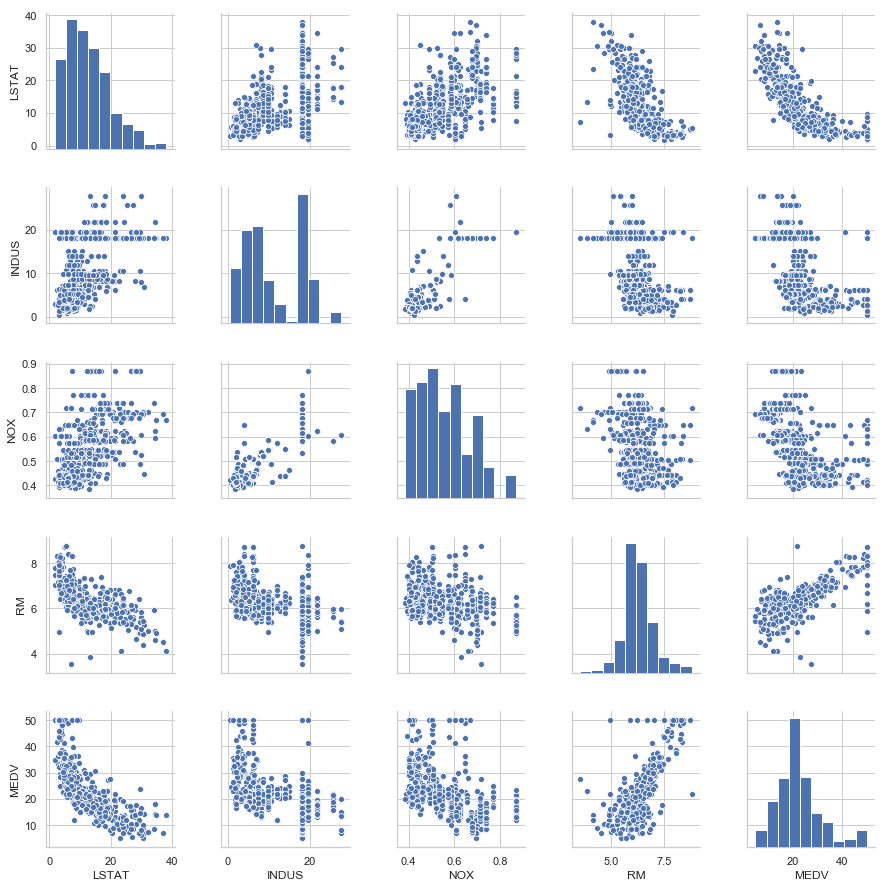

In [26]:
sns.set(style = 'whitegrid', context='notebook')
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols], height=2.5)
plt.tight_layout()

In [27]:
cm = np.corrcoef(df[cols].values.T)

In [28]:
sns.set(font_scale=1.5)

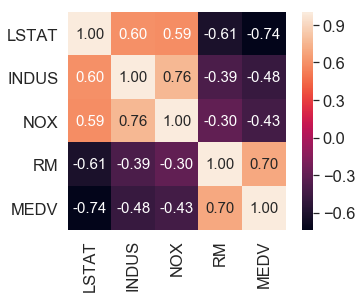

In [29]:
hm = sns.heatmap(cm, cbar = True, annot=True, square=True, fmt = '.2f', annot_kws={'size':15},
                 yticklabels=cols,
                 xticklabels=cols)

In [30]:
#NOT MAKING USE OF THIS CLASS RIGHT NOW
class LinearRegressionGD(object):
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = y - output
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return self.net_input(X)
    

In [31]:
#THIS IS BEING USED TO GATHER VALUES FROM DATAFRAME
from sklearn.linear_model import LinearRegression
X = df[['RM']].values
y = df['MEDV'].values


In [32]:
#THIS I WILL MAKE USE OF LATER THERE ARE SOME ERRORS HERE
"""from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flattern()
"""


'from sklearn.preprocessing import StandardScaler\nsc_x = StandardScaler()\nsc_y = StandardScaler()\nX_std = sc_x.fit_transform(X)\ny_std = sc_y.fit_transform(y[:, np.newaxis]).flattern()\n'

In [35]:
lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X)
print('Slope: %.3f' %lr.coef_[0])
print('Intercept: %.3f'%lr.intercept_)

Slope: 9.102
Intercept: -34.671


In [39]:
y = lr.coef_[0] * X + lr.intercept_

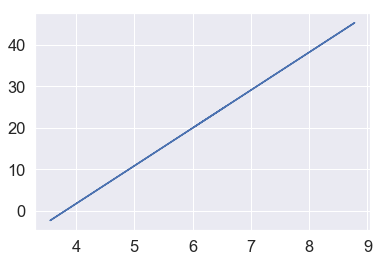

In [40]:
plt.plot(X, y_pred)

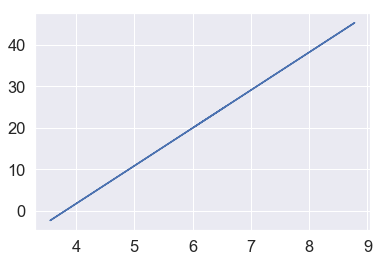

In [41]:
plt.plot(X,y)